<h2 align="center">CIFAR10 Classification</h2>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Data Load

In [3]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [4]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [5]:
batch_size = 100

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Visualize a Few Images

In [6]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


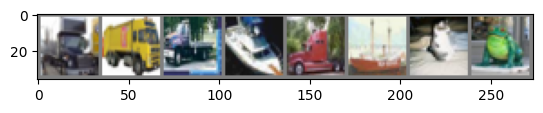

In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images[:8]))

In [8]:
labels[:8]

tensor([9, 9, 9, 8, 9, 8, 3, 6])

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
[classes[i] for i in labels[:8]]

['truck', 'truck', 'truck', 'ship', 'truck', 'ship', 'cat', 'frog']

### Train a Neural Network

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(3,3), padding='same'),  # Output: (32, 32, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),        # Output: (32, 16, 16)
            
            nn.Conv2d(32, 64, kernel_size=(3,3)),             # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))         # Output: (64, 7, 7)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                # Flatten to (64 * 7 * 7 = 3136)
            nn.Linear(64 * 7 * 7, 600),                  # Corrected input size
            nn.ReLU(),
            nn.Linear(600, 120),
            nn.ReLU(),
            nn.Linear(120, 10)
        )
        
    def forward(self, x):
        x = self.network(x)
        x = self.fc_layers(x)
        return x

In [12]:
model = CNN()
dummy_input = torch.randn(1, 3, 32, 32)  # Single example with CIFAR-10 dimensions
output = model(dummy_input)
print("Output shape:", output.shape)  # Should be [1, 10]

Output shape: torch.Size([1, 10])


In [13]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

Epoch [1/10], Step [100/500], Loss: 1.7153
Epoch [1/10], Step [200/500], Loss: 1.2644
Epoch [1/10], Step [300/500], Loss: 1.3950
Epoch [1/10], Step [400/500], Loss: 1.0272
Epoch [1/10], Step [500/500], Loss: 0.9479
Epoch [2/10], Step [100/500], Loss: 0.8139
Epoch [2/10], Step [200/500], Loss: 1.0721
Epoch [2/10], Step [300/500], Loss: 0.7493
Epoch [2/10], Step [400/500], Loss: 0.8260
Epoch [2/10], Step [500/500], Loss: 1.0605
Epoch [3/10], Step [100/500], Loss: 0.8442
Epoch [3/10], Step [200/500], Loss: 0.6834
Epoch [3/10], Step [300/500], Loss: 0.6526
Epoch [3/10], Step [400/500], Loss: 0.6342
Epoch [3/10], Step [500/500], Loss: 0.7348
Epoch [4/10], Step [100/500], Loss: 0.5532
Epoch [4/10], Step [200/500], Loss: 0.5512
Epoch [4/10], Step [300/500], Loss: 0.4222
Epoch [4/10], Step [400/500], Loss: 0.6130
Epoch [4/10], Step [500/500], Loss: 0.4493
Epoch [5/10], Step [100/500], Loss: 0.3353
Epoch [5/10], Step [200/500], Loss: 0.3174
Epoch [5/10], Step [300/500], Loss: 0.4452
Epoch [5/10